In [1]:
from analysis.get_dataframe_from_results import get_pandas_dataset
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_fix_position_cleaned, bar_chart_cleaned
from analysis.get_results import sucess_vs_position_cleaned,  get_latex_table_with_verif_stats

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [4]:
RESULT_DIR = gl.BASE_PATH / "results/dafny_llm_results_pre_test__testing_different_models"
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET_TEST

print(DATASET_DIR)
print(RESULT_DIR)
verif_data_pd = get_pandas_dataset(DATASET_DIR, RESULT_DIR)
verif_data_pd  = verif_data_pd.assign(success=lambda d: d['verif_sucess'] > 0) 

/home/ricostynha/Desktop/daisy/dataset/dafny_assertion_dataset_test
/home/ricostynha/Desktop/daisy/results/dafny_llm_results_pre_test__testing_different_models


<>:19: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:19: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
/tmp/ipykernel_69629/1876176147.py:19: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  info = get_latex_table_with_verif_stats(verif_data_pd, "Comparison of different LLMs on pre-test dataset showing accuracy (\$) and cost per run (cents).", "res:pre-test-run", test_models)



\begin{table}[!t]
\begin{center}
\small
\caption{Comparison of different LLMs on pre-test dataset showing accuracy (\$) and cost per run (cents).}
\label{res:pre-test-run}
\begin{tabular}{|l|c|c|c|c|}
\hline
\multirow{2}{*}{Approach} & \multicolumn{4}{c|}{Benchmarks} \\
\cline{2-5}
 & w/o-1 (26) & w/o-2 (4) & All (0) & Combined (30) \\
\hline
C.Opus & 19 (73.0\%) & \phantom{0}3 (75.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 22 (73.3\%) \\
GPT-5.2 & 18 (69.0\%) & \phantom{0}3 (75.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 21 (70.0\%) \\
C.Haiku & 18 (69.0\%) & \phantom{0}2 (50.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 20 (66.7\%) \\
C.Sonnet & 16 (61.0\%) & \phantom{0}3 (75.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 19 (63.3\%) \\
GPT-5.2 mini & 16 (61.0\%) & \phantom{0}3 (75.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 19 (63.3\%) \\
DeepS.R1 & 14 (53.0\%) & \phantom{0}3 (75.0\%) & \phantom{0}0 (\phantom{0}0.0\%) & 17 (56.7\%) \\
Q3.C 480B & 13 (50.0\%) & \phantom{0}2 (50.0\%) & \phantom{0}0 (\p

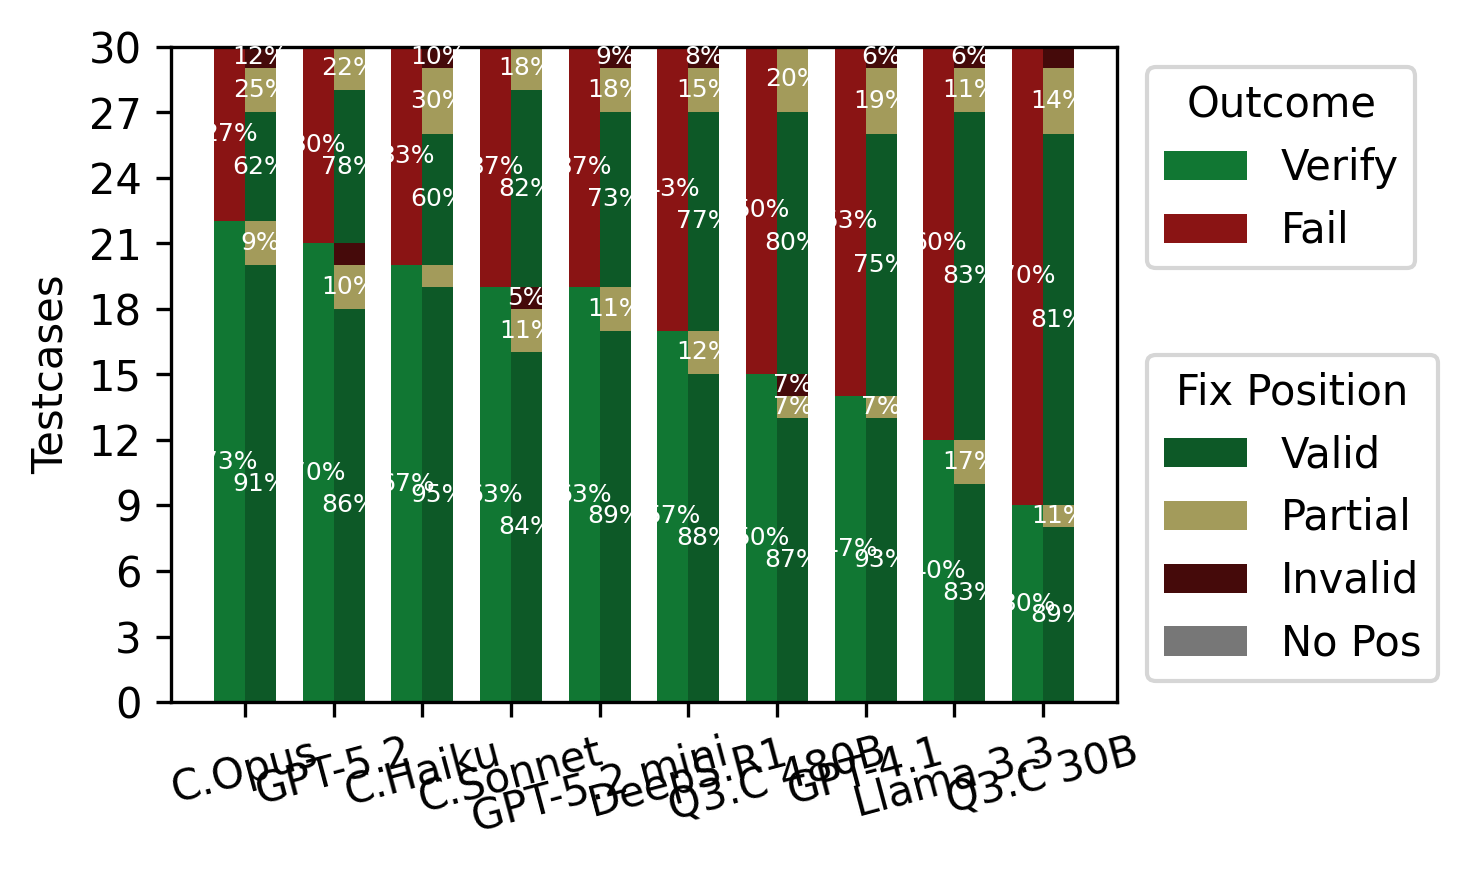

In [6]:
# Graphs of position evaluation
test_models ={ 
    "claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "C.Opus",
    "gpt-5.2__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "GPT-5.2",
    "claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "C.Haiku",
    "claude-sonnet-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "C.Sonnet",
    "gpt-5-mini__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE" : "GPT-5.2 mini",
    "deepseek-r1__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "DeepS.R1",
    "qwen3-coder-480b__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "Q3.C 480B",                               
    "gpt-4.1__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "GPT-4.1",
    "llama-3.3-70b__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "Llama 3.3",
    "qwen3-coder-30b__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE": "Q3.C 30B",
    
}

dual_name = "test_datset__prev_test_with_all_llms.pdf"
images_p = gl.BASE_PATH / "images"

info = get_latex_table_with_verif_stats(verif_data_pd, "Comparison of different LLMs on pre-test dataset showing accuracy (\$) and cost per run (cents).", "res:pre-test-run", test_models)
print(info)
sucess_vs_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / dual_name)